In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report 

In [177]:
# lets explore the data with multiple technique
df = pd.read_csv('test.csv')
df

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option
0,2023-04,Oceania,Volkswagen,Model 3,SUV,45,16,Budget Conscious,No
1,2023-10,Oceania,Ford,Model 3,Sedan,89,5,Tech Enthusiast,Yes
2,2023-10,South America,Volkswagen,Atto 3,Sedan,61,4,Budget Conscious,Yes
3,2023-02,Africa,Volkswagen,Corolla EV,Crossover,100,16,Eco-Conscious,No
4,2023-10,North America,Tesla,Rio EV,Sedan,70,8,Eco-Conscious,Yes
...,...,...,...,...,...,...,...,...,...
270,2023-08,Oceania,BMW,Tucson EV,SUV,63,4,Eco-Conscious,Yes
271,2023-02,Africa,Hyundai,Mach-E,Hatchback,93,9,Eco-Conscious,Yes
272,2023-01,Africa,BMW,Model 3,Crossover,61,10,High Income,Yes
273,2023-07,Oceania,Nissan,Atto 3,SUV,48,20,Eco-Conscious,Yes


In [178]:
df.head(5)

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option
0,2023-04,Oceania,Volkswagen,Model 3,SUV,45,16,Budget Conscious,No
1,2023-10,Oceania,Ford,Model 3,Sedan,89,5,Tech Enthusiast,Yes
2,2023-10,South America,Volkswagen,Atto 3,Sedan,61,4,Budget Conscious,Yes
3,2023-02,Africa,Volkswagen,Corolla EV,Crossover,100,16,Eco-Conscious,No
4,2023-10,North America,Tesla,Rio EV,Sedan,70,8,Eco-Conscious,Yes


In [181]:
df.tail(5)

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option
270,2023-08,Oceania,BMW,Tucson EV,SUV,63,4,Eco-Conscious,Yes
271,2023-02,Africa,Hyundai,Mach-E,Hatchback,93,9,Eco-Conscious,Yes
272,2023-01,Africa,BMW,Model 3,Crossover,61,10,High Income,Yes
273,2023-07,Oceania,Nissan,Atto 3,SUV,48,20,Eco-Conscious,Yes
274,2023-12,Europe,Nissan,Elantra EV,Sedan,85,0,High Income,Yes


In [182]:
df = pd.read_csv('test.csv')
df
scaler = MinMaxScaler()
df['Battery_Capacity_kWh_norm'] = scaler.fit_transform(df[['Battery_Capacity_kWh']])
df

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Battery_Capacity_kWh_norm
0,2023-04,Oceania,Volkswagen,Model 3,SUV,45,16,Budget Conscious,No,0.083333
1,2023-10,Oceania,Ford,Model 3,Sedan,89,5,Tech Enthusiast,Yes,0.816667
2,2023-10,South America,Volkswagen,Atto 3,Sedan,61,4,Budget Conscious,Yes,0.350000
3,2023-02,Africa,Volkswagen,Corolla EV,Crossover,100,16,Eco-Conscious,No,1.000000
4,2023-10,North America,Tesla,Rio EV,Sedan,70,8,Eco-Conscious,Yes,0.500000
...,...,...,...,...,...,...,...,...,...,...
270,2023-08,Oceania,BMW,Tucson EV,SUV,63,4,Eco-Conscious,Yes,0.383333
271,2023-02,Africa,Hyundai,Mach-E,Hatchback,93,9,Eco-Conscious,Yes,0.883333
272,2023-01,Africa,BMW,Model 3,Crossover,61,10,High Income,Yes,0.350000
273,2023-07,Oceania,Nissan,Atto 3,SUV,48,20,Eco-Conscious,Yes,0.133333


In [183]:
df['Date'] = pd.to_datetime(df['Date'] + '-01')
df['Date'] = df['Date'].apply(lambda x: x.replace(year=2025))
df.head(10)

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Battery_Capacity_kWh_norm
0,2025-04-01,Oceania,Volkswagen,Model 3,SUV,45,16,Budget Conscious,No,0.083333
1,2025-10-01,Oceania,Ford,Model 3,Sedan,89,5,Tech Enthusiast,Yes,0.816667
2,2025-10-01,South America,Volkswagen,Atto 3,Sedan,61,4,Budget Conscious,Yes,0.350000
3,2025-02-01,Africa,Volkswagen,Corolla EV,Crossover,100,16,Eco-Conscious,No,1.000000
4,2025-10-01,North America,Tesla,Rio EV,Sedan,70,8,Eco-Conscious,Yes,0.500000
5,2025-01-01,Africa,Tesla,Model S,Hatchback,67,6,High Income,No,0.450000
6,2025-04-01,North America,Toyota,Atto 3,Truck,41,10,Eco-Conscious,Yes,0.016667
7,2025-06-01,Oceania,Ford,ID.3,Sedan,75,19,High Income,No,0.583333
8,2025-03-01,Africa,BMW,Han EV,SUV,59,7,Tech Enthusiast,Yes,0.316667
9,2025-06-01,North America,BMW,Han EV,Truck,58,6,Budget Conscious,No,0.300000


In [184]:
df = df.rename(columns= {'Battery_Capacity_kWh':'Battery_Capacity_kwh'})
df

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kwh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Battery_Capacity_kWh_norm
0,2025-04-01,Oceania,Volkswagen,Model 3,SUV,45,16,Budget Conscious,No,0.083333
1,2025-10-01,Oceania,Ford,Model 3,Sedan,89,5,Tech Enthusiast,Yes,0.816667
2,2025-10-01,South America,Volkswagen,Atto 3,Sedan,61,4,Budget Conscious,Yes,0.350000
3,2025-02-01,Africa,Volkswagen,Corolla EV,Crossover,100,16,Eco-Conscious,No,1.000000
4,2025-10-01,North America,Tesla,Rio EV,Sedan,70,8,Eco-Conscious,Yes,0.500000
...,...,...,...,...,...,...,...,...,...,...
270,2025-08-01,Oceania,BMW,Tucson EV,SUV,63,4,Eco-Conscious,Yes,0.383333
271,2025-02-01,Africa,Hyundai,Mach-E,Hatchback,93,9,Eco-Conscious,Yes,0.883333
272,2025-01-01,Africa,BMW,Model 3,Crossover,61,10,High Income,Yes,0.350000
273,2025-07-01,Oceania,Nissan,Atto 3,SUV,48,20,Eco-Conscious,Yes,0.133333


In [185]:
df= df.reset_index(drop=True) 
df.head()

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kwh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Battery_Capacity_kWh_norm
0,2025-04-01,Oceania,Volkswagen,Model 3,SUV,45,16,Budget Conscious,No,0.083333
1,2025-10-01,Oceania,Ford,Model 3,Sedan,89,5,Tech Enthusiast,Yes,0.816667
2,2025-10-01,South America,Volkswagen,Atto 3,Sedan,61,4,Budget Conscious,Yes,0.350000
3,2025-02-01,Africa,Volkswagen,Corolla EV,Crossover,100,16,Eco-Conscious,No,1.000000
4,2025-10-01,North America,Tesla,Rio EV,Sedan,70,8,Eco-Conscious,Yes,0.500000


In [187]:
df.describe()

,Date,Battery_Capacity_kwh,Discount_Percentage,Battery_Capacity_kWh_norm
count,275,275.000000,275.000000,275.000000
mean,2025-06-10 22:25:44.727272704,69.440000,8.541818,0.490667
min,2025-01-01 00:00:00,40.000000,0.000000,0.000000
25%,2025-04-01 00:00:00,56.000000,4.000000,0.266667
50%,2025-06-01 00:00:00,69.000000,8.000000,0.483333
75%,2025-09-01 00:00:00,83.500000,14.000000,0.725000
max,2025-12-01 00:00:00,100.000000,20.000000,1.000000
std,NaN,17.122334,5.717903,0.285372


In [193]:
df.isnull().sum()

Date                         0
Region                       0
Brand                        0
Model                        0
Vehicle_Type                 0
Battery_Capacity_kwh         0
Discount_Percentage          0
Customer_Segment             0
Fast_Charging_Option         0
Battery_Capacity_kWh_norm    0
dtype: int64

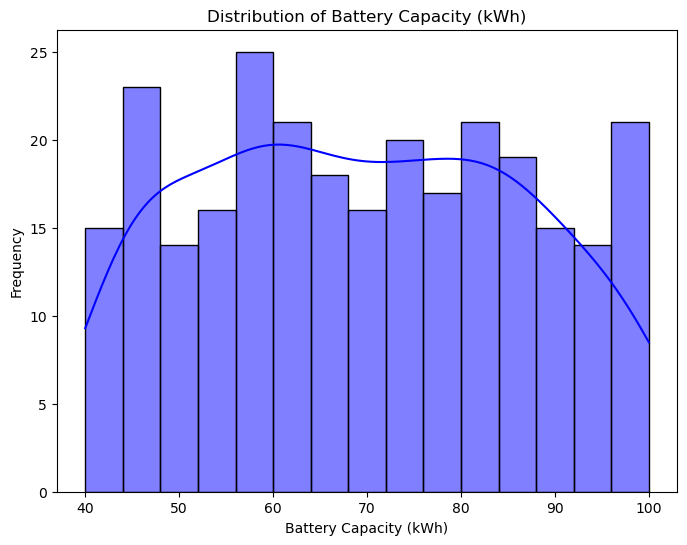

In [195]:
#lets visualized the data
plt.figure(figsize=(8, 6))
sns.histplot(df['Battery_Capacity_kwh'], bins=15, kde=True, color='blue')
plt.title('Distribution of Battery Capacity (kWh)')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Frequency')
plt.show()


C:\Users\HC\AppData\Local\Temp\ipykernel_7768\3424549624.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Brand',data=df,  palette='Set2')


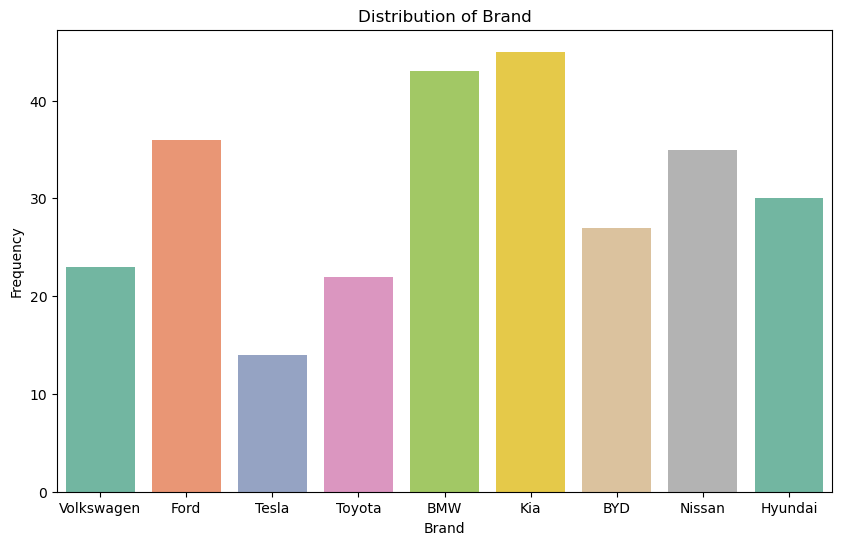

In [196]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Brand',data=df,  palette='Set2')
plt.title('Distribution of Brand')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.show()

C:\Users\HC\AppData\Local\Temp\ipykernel_7768\3424548049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fast_Charging_Option', data=df, palette="Set3")


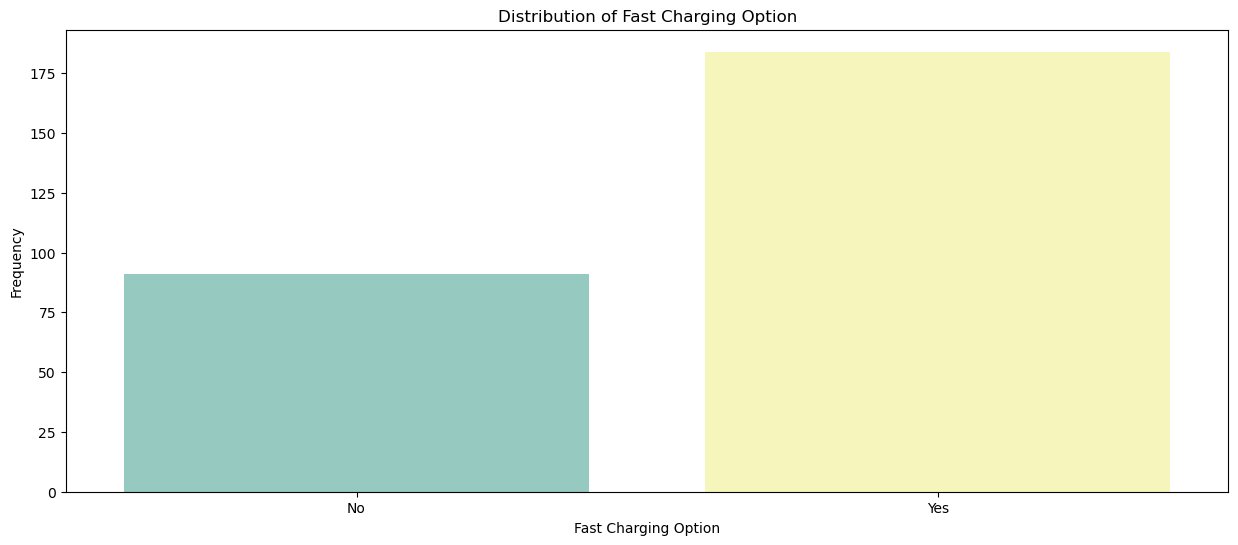

In [197]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Fast_Charging_Option', data=df, palette="Set3")
plt.title('Distribution of Fast Charging Option')
plt.xlabel('Fast Charging Option')
plt.ylabel('Frequency')
plt.show()

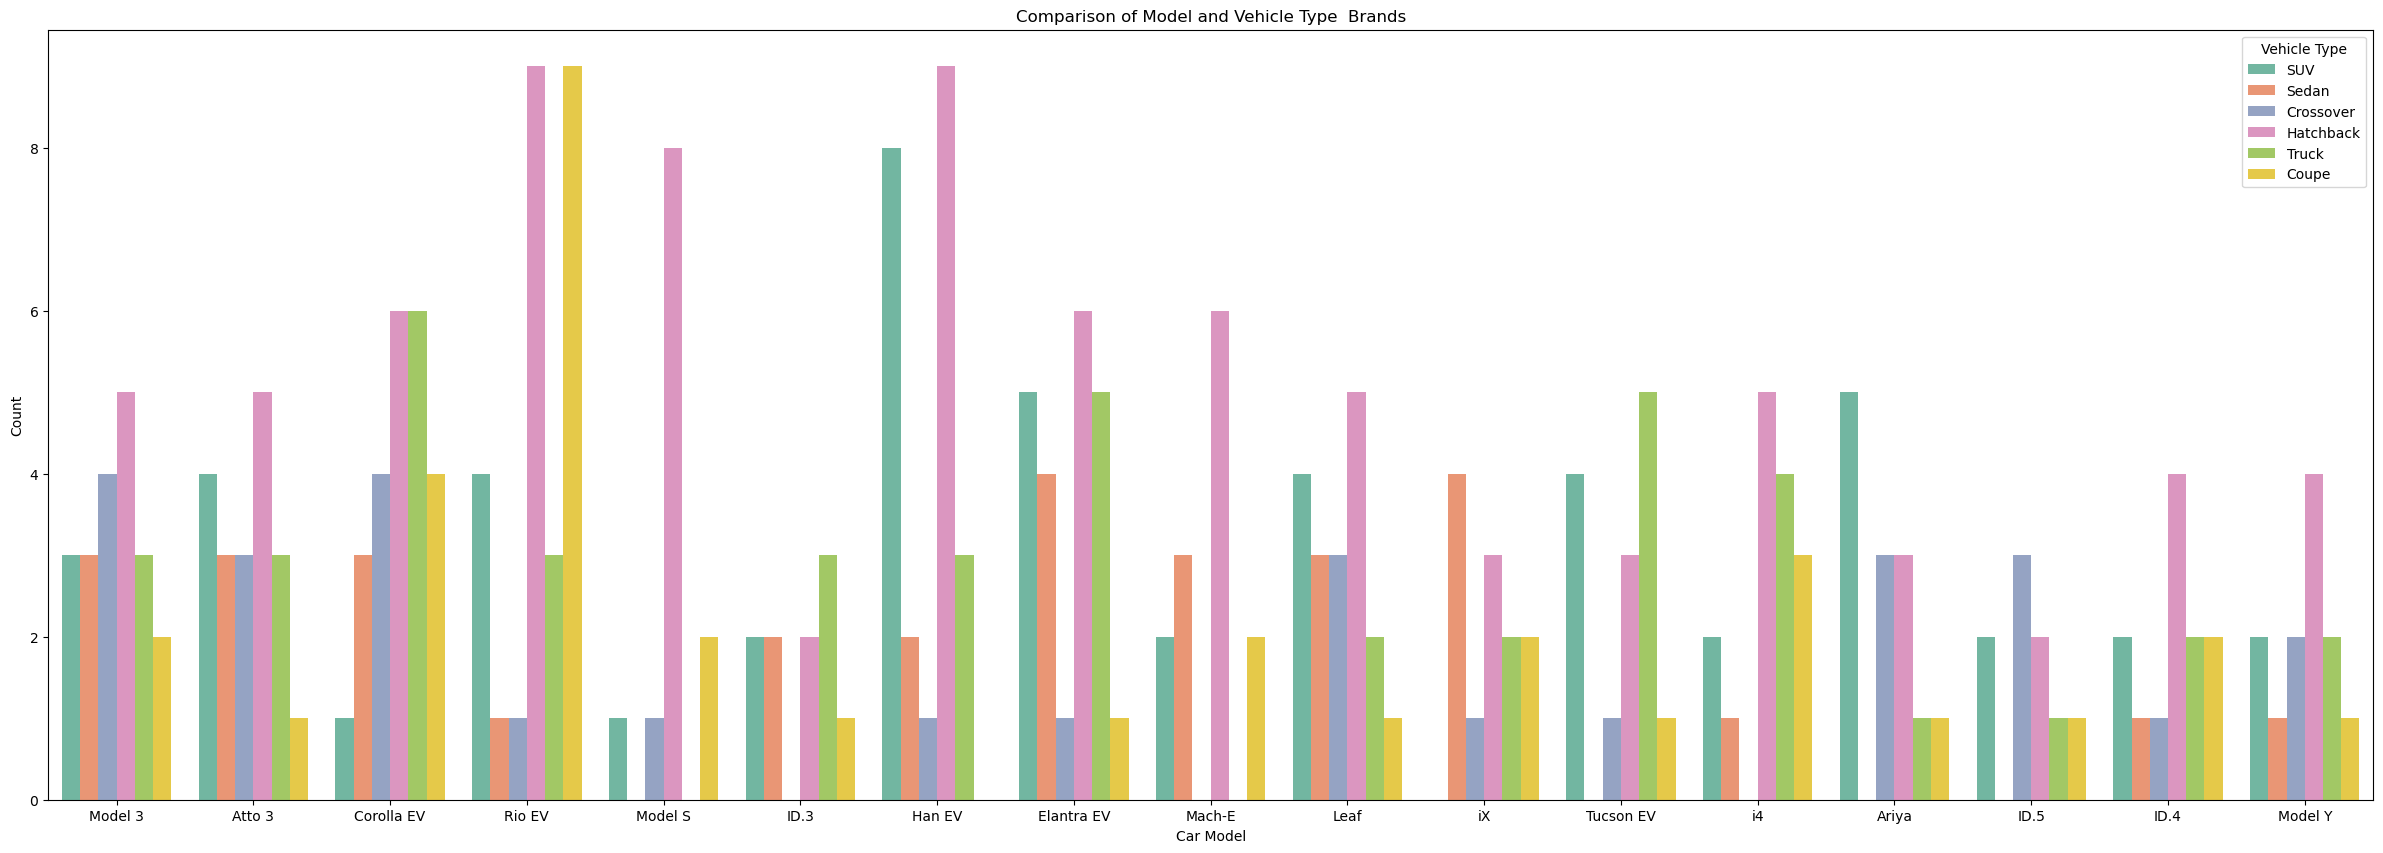

In [199]:
plt.figure(figsize=(30, 10))
sns.countplot(x='Model', hue='Vehicle_Type', data=df, palette='Set2')
plt.title('Comparison of Model and Vehicle Type  Brands')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.legend(title='Vehicle Type')
plt.show()

In [205]:
#lets train a model 
df['High_Discount'] = (df['Discount_Percentage'] > 10).astype(int)
features = ['Battery_Capacity_kwh', 'Battery_Capacity_kWh_norm']
X = df[features]
y = df['High_Discount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
print("\nclassification report\n", classification_report(y_test, y_pred))

accuracy 0.7272727272727273

classification report
               precision    recall  f1-score   support

           0       0.73      1.00      0.84        40
           1       0.00      0.00      0.00        15

    accuracy                           0.73        55
   macro avg       0.36      0.50      0.42        55
weighted avg       0.53      0.73      0.61        55



C:\Users\HC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       275 non-null    datetime64[ns]
 1   Region                     275 non-null    object        
 2   Brand                      275 non-null    object        
 3   Model                      275 non-null    object        
 4   Vehicle_Type               275 non-null    object        
 5   Battery_Capacity_kwh       275 non-null    int64         
 6   Discount_Percentage        275 non-null    int64         
 7   Customer_Segment           275 non-null    object        
 8   Fast_Charging_Option       275 non-null    object        
 9   Battery_Capacity_kWh_norm  275 non-null    float64       
 10  High_Discount              275 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(6)
memory 